In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import decomposition

In [2]:
path = 'E:\PersonalFiles\杂项\Dissertation\Data/diabetes_data.csv'

def preprocess(path):
    with open(path, 'r') as f:
        df = pd.read_csv(path)
    df['Gender'] = df['Gender'].replace('Male', 1)
    df['Gender'] = df['Gender'].replace('Female', 0)
    df.iloc[:, 2:] = df.iloc[:, 2:].replace({'Yes':1, 'No':0, 'Positive':1, 'Negative':0})
    df.iloc[:, 0] = df.iloc[:, 0] / 90

    df_positive = df[df['class']==1]
    df_negative = df[df['class']==0]
    return df, df_positive, df_negative

df, df_positive, df_negative = preprocess(path)

In [3]:
df.shape

(520, 17)

## PCA降维

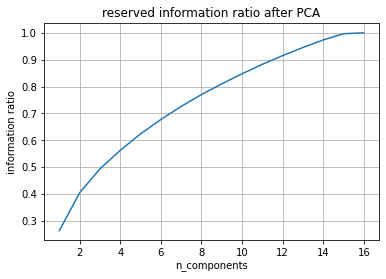

In [4]:
n = range(1, 17)
ls = []
for i in range(1, 17):
    pca = decomposition.PCA(i)
    pca.fit(df.iloc[:, :16])
    ls.append(pca.explained_variance_ratio_.sum())
plt.xlabel('n_components')
plt.ylabel('information ratio')
plt.title('reserved information ratio after PCA')
plt.plot(n, ls)
plt.grid()

结论：由于不能以较小的代价大幅度减小特征属性个数，因此不采用降维方法

## split training set and testing set

In [5]:
from sklearn.model_selection import train_test_split
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(df_positive.iloc[:, :16], df_positive.iloc[:, 16], test_size=0.3)
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(df_negative.iloc[:, :16], df_negative.iloc[:, 16], test_size=0.3)

x_train, x_test = pd.concat([x_train_p, x_train_n]), pd.concat([x_test_p, x_test_n])
y_train, y_test = pd.concat([y_train_p, y_train_n]), pd.concat([y_test_p, y_test_n])

## Models

In [6]:
# baseline model
from sklearn.linear_model  import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.9358974358974359

In [7]:
# SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9807692307692307

In [8]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
clf.score(x_test, y_test)

0.9615384615384616

In [9]:
# ensemble: random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9935897435897436